<a href="https://colab.research.google.com/github/Yuasset/Yuasset/blob/main/mumpy_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Model hazırlanması ve eğitimi
! git clone https://github.com/Karamubarek/urban-sounds-files.git

Cloning into 'urban-sounds-files'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 12 (delta 0), reused 3 (delta 0), pack-reused 9
Unpacking objects: 100% (12/12), done.
Checking out files: 100% (8/8), done.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
a = np.load('urban-sounds-files/X_train.npz', allow_pickle=True)
X_train = a['data']
a = np.load('urban-sounds-files/X_test.npz', allow_pickle=True)
X_test = a['data'] 
a = np.load('urban-sounds-files/X_val.npz', allow_pickle=True)
X_val = a['data']
a = np.load('urban-sounds-files/y_train.npz', allow_pickle=True)
y_train = a['data']
a = np.load('urban-sounds-files/y_test.npz', allow_pickle=True)
y_test = a['data']
a = np.load('urban-sounds-files/y_val.npz', allow_pickle=True)
y_val = a['data']

In [ ]:
#CNN modeli hazırlayın
#labelencoder = LabelEncoder()
#dataset['diagnosis]']= labelencoder.fit_transform(dataset['diagnosis'].values)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 input_shape = (128,128,1)))
                                  

model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 ))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 ))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
results= model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=50,
                   validation_data= (X_val, y_val)
                   )

Epoch 1/50
55/55 [==============================] - 16s 120ms/step - loss: 2.1024 - accuracy: 0.2215 - val_loss: 1.6960 - val_accuracy: 0.3975
Epoch 2/50
55/55 [==============================] - 5s 89ms/step - loss: 1.7464 - accuracy: 0.3658 - val_loss: 1.2963 - val_accuracy: 0.5590
Epoch 3/50
55/55 [==============================] - 5s 89ms/step - loss: 1.4436 - accuracy: 0.4918 - val_loss: 0.9229 - val_accuracy: 0.7400
Epoch 4/50
55/55 [==============================] - 5s 89ms/step - loss: 1.2162 - accuracy: 0.5847 - val_loss: 0.7619 - val_accuracy: 0.7858
Epoch 5/50
55/55 [==============================] - 5s 92ms/step - loss: 1.0477 - accuracy: 0.6394 - val_loss: 0.6712 - val_accuracy: 0.8121
Epoch 6/50
55/55 [==============================] - 5s 90ms/step - loss: 0.9114 - accuracy: 0.6898 - val_loss: 0.6088 - val_accuracy: 0.8225
Epoch 7/50
55/55 [==============================] - 5s 90ms/step - loss: 0.8344 - accuracy: 0.7181 - val_loss: 0.5913 - val_accuracy: 0.8373
Epoch 8/50


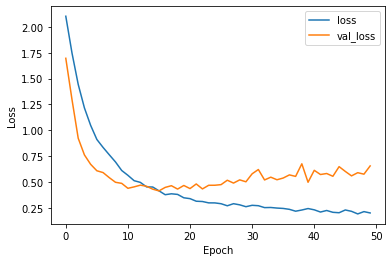

In [ ]:
#Modelin performans metriklerini, loss ve accuracy grafiklerini ekrana yazdırın
# Plot the the training loss
plt.plot(results.history['loss'], label='loss')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label='val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Put legend table
plt.legend()

# Show the plot
plt.show()

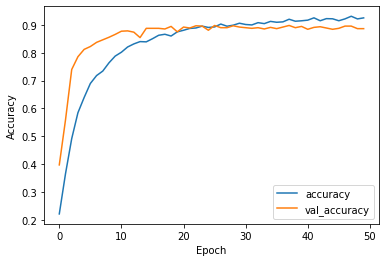

In [ ]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label='accuracy')

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label='val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 18ms/step - loss: 0.7118 - accuracy: 0.8833


[0.7117721438407898, 0.8832951784133911]

In [ ]:
prediction_result = model.predict(X_test[69].reshape(1,128,128,1))

In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [ ]:
# Print the results
print(f'This image belongs to class {predicted_class} with {predicted_probability} probability % ')
print(f'The real class of this image is class {y_test[69]}')

This image belongs to class 4 with 0.9948891401290894 probability % 
The real class of this image is class 4


In [ ]:
#Aldığınız sonuçlara göre hyperparameter optimization yapın
from tensorflow.keras.optimizers import Adam
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 input_shape = (128,128,1)))
                                  

model2.add(tf.keras.layers.MaxPool2D(2,2))

model2.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 ))
model2.add(tf.keras.layers.MaxPool2D(2,2))
model2.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'same',
                                 activation = 'relu',
                                 ))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(128, activation= 'relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(64, activation= 'relu'))
model2.add(tf.keras.layers.Dropout(0.5))


model2.add(tf.keras.layers.Dense(64, activation= 'relu'))
model2.add(tf.keras.layers.Dropout(0.5))


model2.add(tf.keras.layers.Dense(10,activation='softmax'))


new_optimizer = Adam(learning_rate = 0.001)
model2.compile(optimizer= new_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
results2= model2.fit(X_train, y_train,
                   batch_size=128,
                   epochs=50,
                   validation_data= (X_val, y_val)
                   )

Epoch 1/50
55/55 [==============================] - 6s 97ms/step - loss: 2.2104 - accuracy: 0.1742 - val_loss: 1.9184 - val_accuracy: 0.4227
Epoch 2/50
55/55 [==============================] - 5s 93ms/step - loss: 1.9146 - accuracy: 0.3011 - val_loss: 1.5200 - val_accuracy: 0.5281
Epoch 3/50
55/55 [==============================] - 5s 94ms/step - loss: 1.6478 - accuracy: 0.4034 - val_loss: 1.1718 - val_accuracy: 0.5670
Epoch 4/50
55/55 [==============================] - 5s 94ms/step - loss: 1.4212 - accuracy: 0.4845 - val_loss: 0.9778 - val_accuracy: 0.6621
Epoch 5/50
55/55 [==============================] - 5s 94ms/step - loss: 1.2427 - accuracy: 0.5632 - val_loss: 0.8205 - val_accuracy: 0.7354
Epoch 6/50
55/55 [==============================] - 5s 94ms/step - loss: 1.0838 - accuracy: 0.6202 - val_loss: 0.7467 - val_accuracy: 0.7640
Epoch 7/50
55/55 [==============================] - 5s 94ms/step - loss: 0.9425 - accuracy: 0.6677 - val_loss: 0.6876 - val_accuracy: 0.7995
Epoch 8/50
55

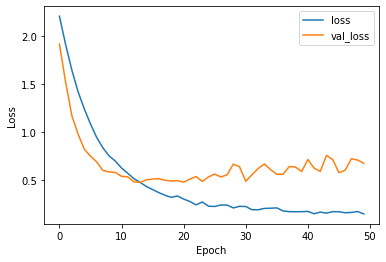

In [ ]:
plt.plot(results2.history['loss'], label='loss')

# Plot the the validation loss
plt.plot(results2.history['val_loss'], label='val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Put legend table
plt.legend()

# Show the plot
plt.show()

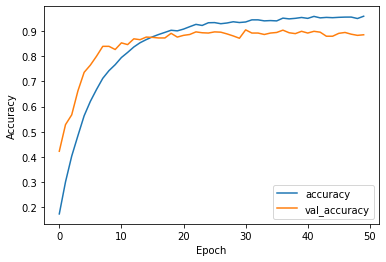

In [ ]:
# Plot the the training accuracy
plt.plot(results2.history['accuracy'], label='accuracy')

# Plot the the validation accuracy
plt.plot(results2.history['val_accuracy'], label='val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
model2.evaluate(X_test, y_test)

28/28 [==============================] - 0s 14ms/step - loss: 1.1065 - accuracy: 0.7311


[1.10652756690979, 0.731121301651001]

In [ ]:
prediction_result2 = model2.predict(X_test[69].reshape(1,128,128,1))

In [ ]:
predicted_class2 = prediction_result2.argmax()
predicted_probability2 = prediction_result2.max()

In [ ]:
print(f'This image belongs to class {predicted_class2} with {predicted_probability2} probability % ')
print(f'The real class of this image is class {y_test[69]}')

This image belongs to class 4 with 0.7342289090156555 probability % 
The real class of this image is class 4
